## DHANUSHKUMAR R

## Internship @The Sparks Foundation !! Data Science & Business Analytics

# Task1 - Prediction Using Supervised Machine Learning 

## Batch - June 2023

# Importing modules 

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Implementing the Linear Regression

In [55]:
class LinearRegression:
    def fit(self,X,y):
        m = X.shape[0]
        X_mean, y_mean = np.mean(X), np.mean(y)
        X_mean_diff, y_mean_diff = X-X_mean, y-y_mean
        self.b1 = (X_mean_diff @ y_mean_diff) / (X_mean_diff @ X_mean_diff)
        self.b0 = y_mean - (self.b1 * X_mean)
        return self
    
    def predict(self,X):
        return self.b0 + X*self.b1

    def evaluate(self,x,y):
        y_pred = self.predict(x)
        y_diff = y-y_pred
        rmse = np.sqrt(y_diff @ y_diff/x.shape[0])
        print("RMSE:",rmse)
        

# Ploting function for regression

In [81]:
def regression_plot(X,y,model,title=""):
    
    plt.figure(figsize=(6,7))
    plt.xlim(1,10)
    plt.ylim(20,100)
    plt.xlabel("Hours")
    plt.ylabel("Scores")
    
    x_line = np.array([np.min(X) - 100,np.max(X) + 100]).reshape(-1,1)
    y_line = model.predict(x_line)
    
    plt.scatter(X, y,c='red', label='Original Data Points')
    plt.plot(x_line, y_line,linewidth=4, label='Regression Line')
    plt.legend()

##  Loading and processing the dataset 

In [64]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()
     

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Ploting distribution for scores

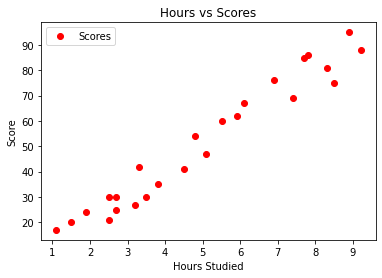

In [76]:
data.plot(x='Hours', y='Scores', style='o',c = 'red')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

## Implementing the linear Regression using Scratch

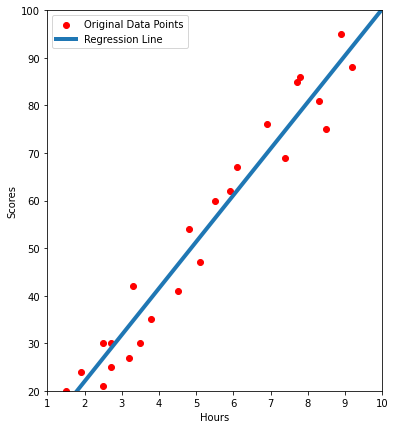

In [82]:

x = data['Hours'].values
y = data['Scores'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = LinearRegression()
model.fit(x_train,y_train)
regression_plot(x,y,model,title = 'Trained Regression model')


## Testing the model

In [78]:

y_pred = model.predict(x_test)
testing = pd.DataFrame({"Actual":y_test ,"Predicted":y_pred})
testing


,Actual,Predicted
0,75,87.016872
1,88,94.046708
2,25,28.769654
3,60,56.889001
4,85,78.982773


## Testing the model with study hour '9.25' per day

In [79]:
hours = 9.25
test = model.predict(hours)
print(f"Spending 9.25 hours per day will make a student able to score {test:.2f}%")
Evaluate = model.evaluate(x,y)


Spending 9.25 hours per day will make a student able to score 94.55%
RMSE: 5.438453344813319
